In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('C:/Users/Christopher Ogbeide/Desktop/Algorithms/Algorithms 2/txt/weather.csv')
dataset[:10]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


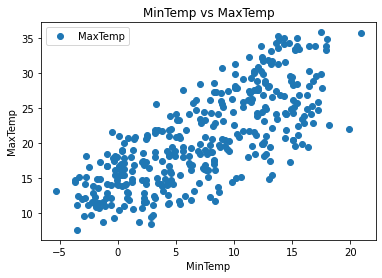

In [9]:
dataset.plot(x = 'MinTemp', y = 'MaxTemp', style = 'o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [35]:
dataset.describe(include='all')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,366.000000,366.000000,366.000000,366.000000,363.000000,363,364.000000,335,365,359.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366,366.000000,366
unique,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NW,NaN,SE,NW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,73,NaN,47,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,NaN,300
mean,7.265574,20.550273,1.428415,4.521858,7.909366,NaN,39.840659,NaN,NaN,9.651811,...,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,NaN,1.428415,NaN
std,6.025800,6.690516,4.225800,2.669383,3.481517,NaN,13.059807,NaN,NaN,7.951929,...,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,NaN,4.225800,NaN
min,-5.300000,7.600000,0.000000,0.200000,0.000000,NaN,13.000000,NaN,NaN,0.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,NaN,0.000000,NaN
25%,2.300000,15.025000,0.000000,2.200000,5.950000,NaN,31.000000,NaN,NaN,6.000000,...,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,NaN,0.000000,NaN
50%,7.450000,19.650000,0.000000,4.200000,8.600000,NaN,39.000000,NaN,NaN,7.000000,...,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,NaN,0.000000,NaN
75%,12.500000,25.500000,0.200000,6.400000,10.500000,NaN,46.000000,NaN,NaN,13.000000,...,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,NaN,0.200000,NaN


In [34]:
dataset.columns
dataset.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RISK_MM'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

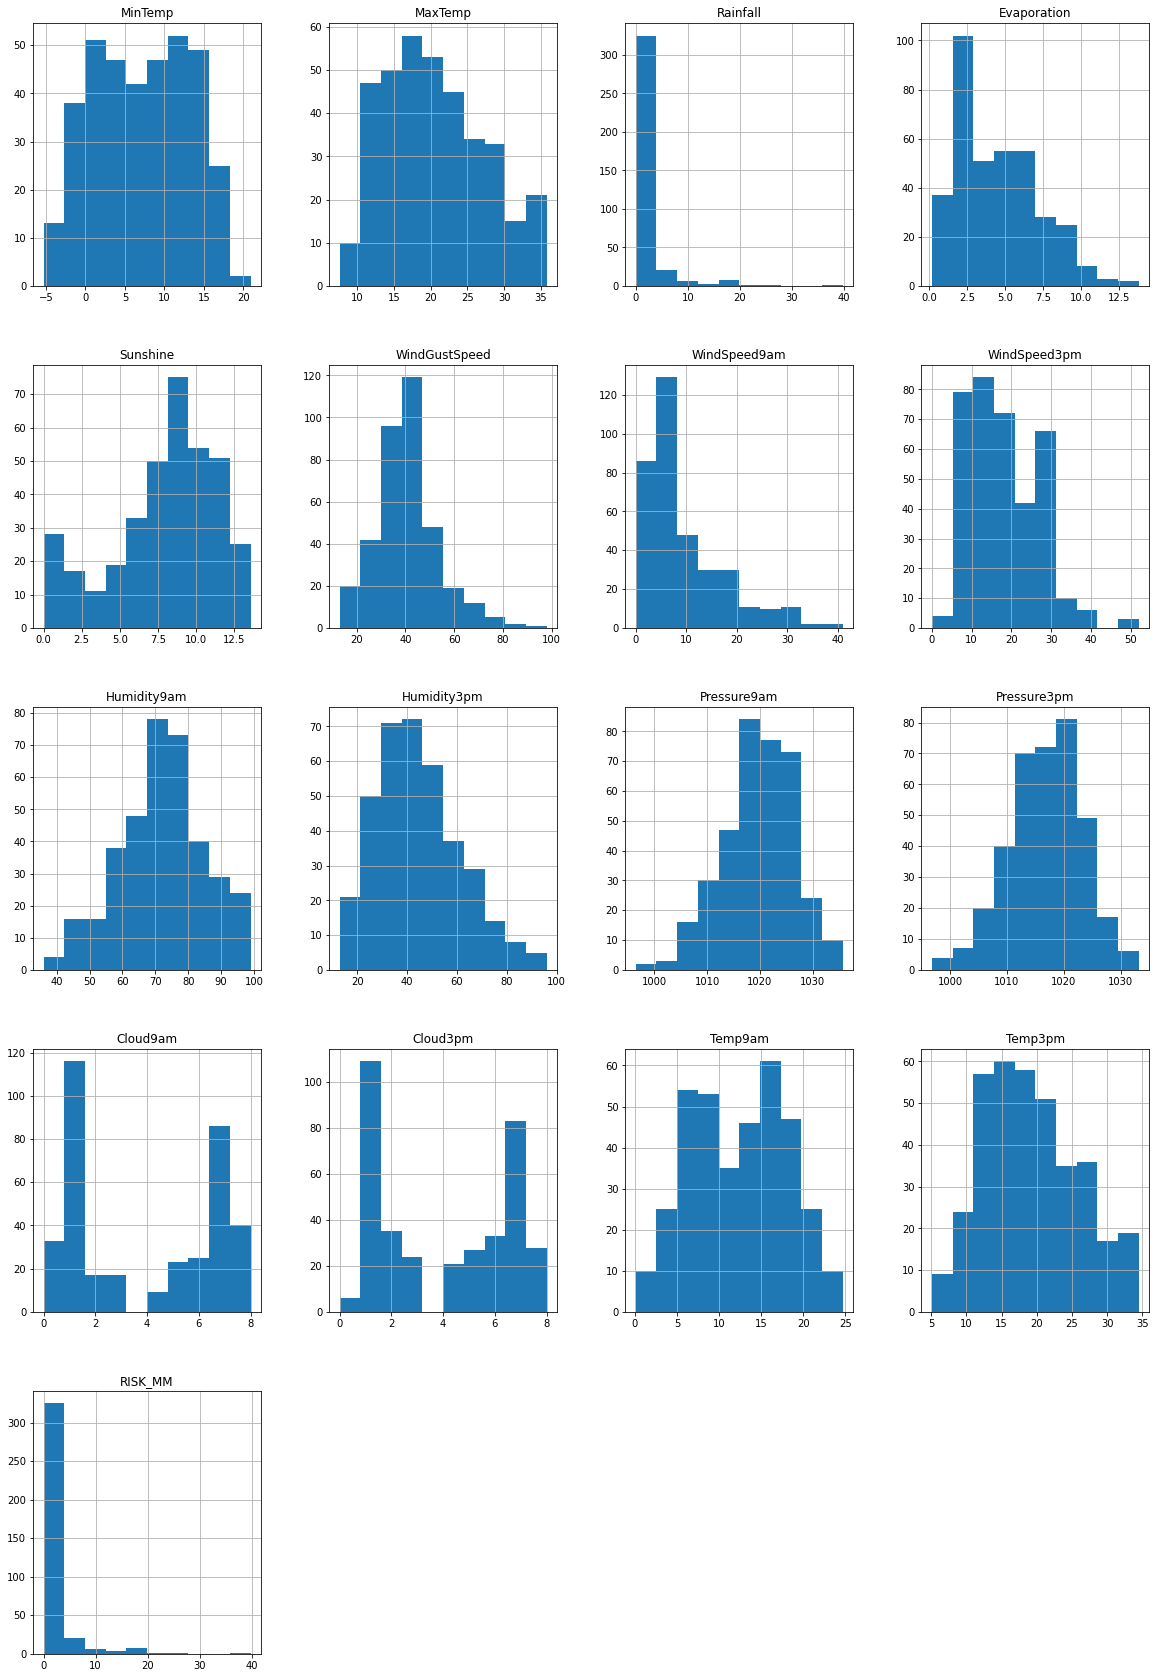

In [3]:
dataset.hist(figsize=(20, 30))

In [36]:
# DROP COLUMNS
dataset1 = dataset.drop(['WindGustDir', 'WindGustSpeed'], axis = 1)
dataset1.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [75]:
# RENAME COLUMNS
dataset2 = dataset.rename(columns={'WindGustDir': 'Dir', 'WindGustSpeed': 'Speed', 'WindDir9am': '9am'})
dataset2.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Dir,Speed,9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [44]:
dataset3 = dataset.drop_duplicates()
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [76]:
dataset.count()

MinTemp          366
MaxTemp          366
Rainfall         366
Evaporation      366
Sunshine         363
WindGustDir      363
WindGustSpeed    364
WindDir9am       335
WindDir3pm       365
WindSpeed9am     359
WindSpeed3pm     366
Humidity9am      366
Humidity3pm      366
Pressure9am      366
Pressure3pm      366
Cloud9am         366
Cloud3pm         366
Temp9am          366
Temp3pm          366
RainToday        366
RISK_MM          366
RainTomorrow     366
dtype: int64

In [77]:
dataset.shape

(366, 22)

In [78]:
 duplicate_rows_dataset = dataset[dataset.duplicated()]
print('Number of duplicate rows:', duplicate_rows_dataset.shape)

Number of duplicate rows: (0, 22)


In [79]:
dataset = dataset.drop_duplicates()
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [80]:
dataset.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [81]:
#DROP EMPTY ROWS
dataset = dataset.dropna()
dataset.shape

(328, 22)

In [68]:
dataset.count()

MinTemp          328
MaxTemp          328
Rainfall         328
Evaporation      328
Sunshine         328
WindGustDir      328
WindGustSpeed    328
WindDir9am       328
WindDir3pm       328
WindSpeed9am     328
WindSpeed3pm     328
Humidity9am      328
Humidity3pm      328
Pressure9am      328
Pressure3pm      328
Cloud9am         328
Cloud3pm         328
Temp9am          328
Temp3pm          328
RainToday        328
RISK_MM          328
RainTomorrow     328
dtype: int64

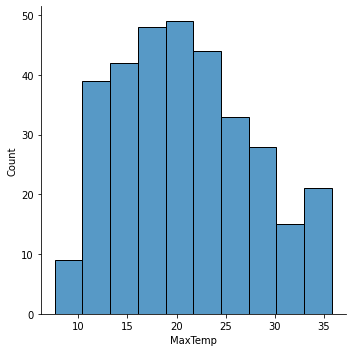

In [87]:
seabornInstance.displot(dataset['MaxTemp'])
plt.show()

In [105]:
x = dataset['MinTemp'].values.reshape (-1, 1)
y = dataset['MaxTemp'].values.reshape (-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

df = pd.DataFrame([y_test.flatten(), y_pred.flatten()])
print(df)


          0          1          2          3          4          5   \
0  28.200000  34.100000  18.300000  11.500000  18.800000  23.400000   
1  22.878725  26.462738  18.014706  18.014706  22.452057  27.828077   

          6          7          8          9   ...         56         57  \
0  14.700000  32.100000  14.800000  18.500000  ...  19.000000  27.500000   
1  14.174692  24.841399  25.353401  20.318715  ...  15.369363  24.585398   

          58         59         60         61         62         63  \
0  19.900000  20.000000  20.500000  10.600000  22.800000  20.400000   
1  27.828077  14.686694  21.172052  15.369363  27.913411  22.110722   

          64        65  
0  11.600000  13.90000  
1  16.308033  14.60136  

[2 rows x 66 columns]


In [12]:
dataseth = dataset.head(10)
x = dataseth.iloc[:, :-1].values
y = dataseth.iloc[:, -1].values

In [13]:
print(x)

[[8.0 24.3 0.0 3.4 6.3 'NW' 30.0 'SW' 'NW' 6.0 20 68 29 1019.7 1015.0 7 7
  14.4 23.6 'No' 3.6]
 [14.0 26.9 3.6 4.4 9.7 'ENE' 39.0 'E' 'W' 4.0 17 80 36 1012.4 1008.4 5 3
  17.5 25.7 'Yes' 3.6]
 [13.7 23.4 3.6 5.8 3.3 'NW' 85.0 'N' 'NNE' 6.0 6 82 69 1009.5 1007.2 8 7
  15.4 20.2 'Yes' 39.8]
 [13.3 15.5 39.8 7.2 9.1 'NW' 54.0 'WNW' 'W' 30.0 24 62 56 1005.5 1007.0
  2 7 13.5 14.1 'Yes' 2.8]
 [7.6 16.1 2.8 5.6 10.6 'SSE' 50.0 'SSE' 'ESE' 20.0 28 68 49 1018.3
  1018.5 7 7 11.1 15.4 'Yes' 0.0]
 [6.2 16.9 0.0 5.8 8.2 'SE' 44.0 'SE' 'E' 20.0 24 70 57 1023.8 1021.7 7 5
  10.9 14.8 'No' 0.2]
 [6.1 18.2 0.2 4.2 8.4 'SE' 43.0 'SE' 'ESE' 19.0 26 63 47 1024.6 1022.2 4
  6 12.4 17.3 'No' 0.0]
 [8.3 17.0 0.0 5.6 4.6 'E' 41.0 'SE' 'E' 11.0 24 65 57 1026.2 1024.2 6 7
  12.1 15.5 'No' 0.0]
 [8.8 19.5 0.0 4.0 4.1 'S' 48.0 'E' 'ENE' 19.0 17 70 48 1026.1 1022.7 7 7
  14.1 18.9 'No' 16.2]
 [8.4 22.8 16.2 5.4 7.7 'E' 31.0 'S' 'ESE' 7.0 6 82 32 1024.1 1020.7 7 1
  13.3 21.7 'Yes' 0.0]]


In [14]:
print(y)

['Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No']


In [ ]:
# FIX EMPTY ROWS
#from sklearn.impute import SimpleImputer()
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#imputer.fit(x[:, 1:3])
#imputer.transform(x[:, 1:3])

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('C:/Users/Christopher Ogbeide/Desktop/data/Salary_Data.csv')
dataset[:10]

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
x_test

array([[5.3],
       [7.1],
       [3.9],
       [6. ],
       [4.5],
       [6.8]])

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(x_test)

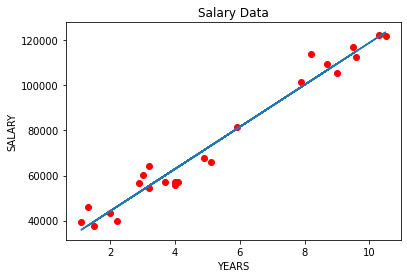

In [21]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train))
plt.title('Salary Data')
plt.xlabel('YEARS')
plt.ylabel('SALARY')
plt.show()

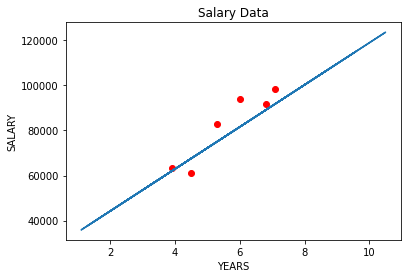

In [22]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train))
plt.title('Salary Data')
plt.xlabel('YEARS')
plt.ylabel('SALARY')
plt.show()

In [37]:
dataseth = pd.read_csv('C:/Users/Christopher Ogbeide/Desktop/data/50_Startups.csv')
dataseth[:10]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
a = dataseth.iloc[:, :-1].values
b = dataseth.iloc[:, -1].values
print(a)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
a = np.array(ct.fit_transform(a))
print(a)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [44]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 1)
print(a_test)

[[0.0 0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 1.0 0.0 1315.46 115816.21 297114.46]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]]


In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(a_train, b_train)

LinearRegression()

In [50]:
y_pred = reg.predict(a_train)

In [53]:
df = pd.DataFrame(y_pred.flatten(), b_train.flatten())
df

,0
97427.84,98762.252920
81005.76,83684.211145
111313.02,117738.474656
90708.19,76944.369708
122776.86,115291.171750
71498.49,71227.431095
14681.40,49751.276578
105733.54,110978.085477
110352.25,115041.505970
134307.35,126810.355394


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
dataset1 = pd.read_csv('C:/Users/Christopher Ogbeide/Desktop/data/Position_Salaries.csv')
dataset1

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [47]:
k = dataset1.iloc[:, :-1].values
l = dataset1.iloc[:, -1].values

print(k)

[['Business Analyst' 1]
 ['Junior Consultant' 2]
 ['Senior Consultant' 3]
 ['Manager' 4]
 ['Country Manager' 5]
 ['Region Manager' 6]
 ['Partner' 7]
 ['Senior Partner' 8]
 ['C-level' 9]
 ['CEO' 10]]


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
k = np.array(ct.fit_transform(k))
print(k)

IndexError: tuple index out of range

In [44]:
from sklearn.model_selection import train_test_split
k_train, k_test, l_train, l_test = train_test_split(k, l, test_size = 0.2, random_state = 1)

TypeError: Singleton array array(<10x11 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>, dtype=object) cannot be considered a valid collection.